# Using Simulated Annealing to optimize for best Wine Quality

In this notebook, we will use simulated annealing optimize over a model trained to predict quality of wine based on physiochemical properties. Simulated Annealing is a gradient-free optimization technique used when the space has lots of local minima to get stuck in. It is probabilistic (meaning it depends on some randomness as opposed to generating the same answer every time) and finds the approximate global optimum of a given function. Due the randomness, it may be a good idea to run the SA algorithm multiple times to ensure consensus on finding the global optimium. Just like any other optimization technique, SA requires input varibles (typically many variables that define the search space and which may be subject to constraints), and an objective or cost function (function that measures whether a solution is good or bad).

Its name comes from annealing or heating and controled cooling of metal to alter its physical and/or chemical properties. Changes to a material's temperature affects its thermodynamic free energy. SA works by simulating cooling i.e. lowering of temperature as the search space is explored. At each temperature step, SA randomly selects a neighboring solution to the current solution ans measures its cost according to the objective function and will accept or reject the neighboring solution depending on its temperature. At higher temperatures, SA will be more likely to accept worse solutions as the solution space is explored, while SA tends to exploit the solution space at lower temperatures. 

SA is often used for problems with discrete search spaces e.g. job scheduling or the traveling salesman problem. It may be used for very hard optimization problems where exact algorithms fail, the approximate global solution is good enough and the gradient is unknown. 

Data Source: https://archive-beta.ics.uci.edu/ml/datasets/wine+quality

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   We will use these datasets for regression task.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

 - Number of Instances: red wine - 1599; white wine - 4898. 

 - Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.
   
 - Missing Attribute Values: None

Attribute information:

   Input variables (based on physicochemical tests):
   
   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur dioxide
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol
   
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt

In [2]:
# read in data
d1 = pd.read_csv(Path().absolute()/'data/winequality-red.csv', sep=';')
d1['red_wine'] = 1
d2 = pd.read_csv(Path().absolute()/'data/winequality-white.csv', sep=';')
d2['red_wine'] = 0
print(f'Size of red wines: {d1.shape}')
print(f'Size of white wines: {d2.shape}')
d2

Size of red wines: (1599, 13)
Size of white wines: (4898, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
# concat 2 datasets into 1
df = pd.concat([d1,d2])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red_wine                  int64
dtype: object

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Text(0.5, 1.0, 'Distribution of Wine Attributes & Quality')

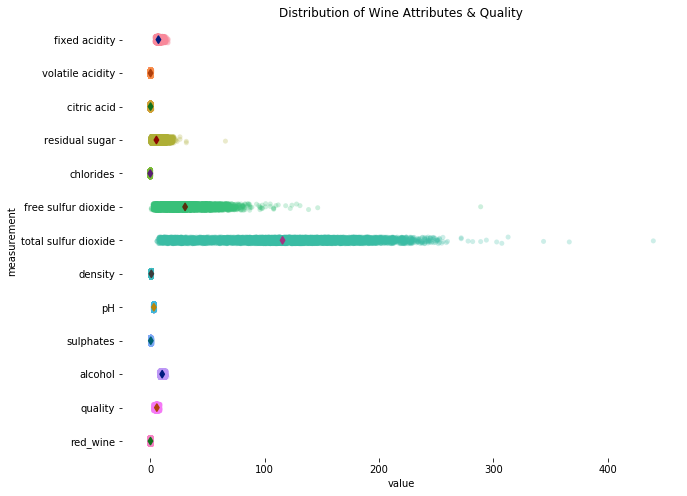

In [6]:
# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(df, var_name='measurement', value_name='value')

# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement",
              data=iris, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement",
              data=iris, dodge=.8 - .8 / 1,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
plt.title("Distribution of Wine Attributes & Quality")

Text(0.5, 1.0, 'Distribution of Wine Attributes & Quality - close up')

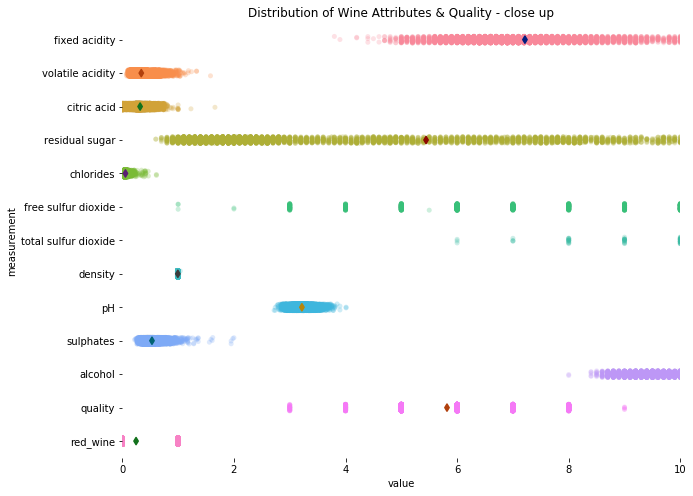

In [7]:
# close up

# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement",
              data=iris, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement",
              data=iris, dodge=.8 - .8 / 1,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
plt.xlim(0, 10)
plt.title("Distribution of Wine Attributes & Quality - close up")

## Train model using xgboost

Some points to note before we proceed with training the xgboost model:

- We are taking the first model we get without tuning hyperparmeters via an automl tool or performing a random grid search because we interested in exploiting the model. I skipped that step here, but encourage the reader to perform due diligence with their ML model before optimizing its inputs.
- We should check whether our model is overfit and thus may want to consider splitting the test set into 2 groups so that we have 2 separate hold-out datasets to prevent overfitting. It is worth noting that some data scientists, don't care about overfitting when optimizing over its input search space because they want a model that closely aligns with its training data when optimizing. Overfitting typically comes at the cost of generalizing poorly to unseen/new data, which may mean that the model will interpolate and extrapolate poorly. This significantly depends on the quality and quantity of your training data. 

In [8]:
# Split the dataset into train/test set
from sklearn.model_selection import train_test_split
X, y = df.drop(columns=['quality']),df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X_train.shape: (4352, 12), y_train.shape: (4352,)
X_test.shape: (2145, 12), y_test.shape: (2145,)


In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Use "hist" for training the model.
xg_reg = xgb.XGBRegressor(tree_method="hist")
# Fit the model using predictor X and response y.
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mape = mean_absolute_percentage_error(y_test, preds)
print("Test RMSE: %f, MAPE: %f" % (rmse,mape))
tpreds = xg_reg.predict(X_train)
trmse = np.sqrt(mean_squared_error(y_train, tpreds))
tmape = mean_absolute_percentage_error(y_train, tpreds)
print("Training RMSE: %f, MAPE: %f" % (trmse,tmape))
# Save model into JSON format. => reg.save_model("regressor.json")

Test RMSE: 0.643106, MAPE: 0.083802
Training RMSE: 0.244802, MAPE: 0.030291


The RSME returns as 0.64 on the quality scale of 0-10 and a mean absolute percentage error of 0.08, which is a decent performance for a regression model.

In [10]:
X_test.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
1504,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.9942,3.26,0.38,12.2,0


In [11]:
xg_reg.predict(X_test.head(1))

array([6.645835], dtype=float32)

In [12]:
preds[0]

6.645835

## Apply Simulated Annealing to optimize over model

- Used to find the global minimum of a cost function, which will be our newly minted model in this case
- Inspired by annealing metal such that the algorithm will be more likely to accept worse solutions when it is "hot" and less likely when it is "cold". This stochastic additon prevents the algo from getting stuck in a local minima like Gradient Descent would. 

Set inital solution s=S0

Set current temperature to initial temperature

Set a temperature decrement rule

Repeat

   Repeat
   
       Select a neighbor solution
       
       Calculate the cost of the neighbor solution
       
       If cost is less than or equal to 0, accept it
       
       Else accept it with probability e^(-cost/temperature)
       
    After max number of iterations for this temperature, stop
    
    Decrement the Temperature
    
Stop when termination conditions are met

Return final solution

The temperature can decrease in 3 ways:
- linear (with alpha)
- geometric (with alpha)
- slow decrease (with beta)

Source Code for Simulated Annealing class: https://towardsdatascience.com/optimization-techniques-simulated-annealing-d6a4785a1de7

Added:
- doc strings
- getting random neighbors
- expand algo to accept any number of inputs
- storing output to pandas df
- verbose option to print output
- upper/lower bound

Next:
- need to implement way to find neighboring int

Note that I did not strictly treat the red_wine variable as binary as the simulated annealing algorithm was allowed to choose any value between 0 (inclusive) & 1 (inclusive).

In [13]:
import random
import math

class SimulatedAnnealing:
    def __init__(self, initialSolution, solutionEvaluator, initialTemp, finalTemp, tempReduction, neighborDistance, 
                 upper_bound,lower_bound,
                 iterationPerTemp=100, alpha=10, beta=5, verbose=1):
        """
        Constructor Method.
            initialSolution : (float) starting solution
            solutionEvaluator: (function) cost function that we are optimizing over
            initialTemp: (float) start temp
            finalTemp : (float) final temp (stopping criteria)
            tempReduction: (str) temperature reduction rule, choice of linear, geometric or slowDecrease
            alpha: (float) temp reduction rule parameter
            beta: (float) temp reduction rule parameter; necessary for Slow-decrease rule, but not other rules
            neighborDistance: (list) distance to search for neighbors in input (search) space
            upper_bound: (list) upper bound in input (search) space
            lower_bound: (list) lower bound in input (search) space
            iterationPerTemp: (float)        
        """
        self.solution = initialSolution
        self.numInputs = len(initialSolution)
        self.evaluate = solutionEvaluator
        self.currTemp = initialTemp
        self.finalTemp = finalTemp
        self.iterationPerTemp = iterationPerTemp
        self.alpha = alpha
        self.beta = beta
        self.verbose = verbose
        self.upper_bound = upper_bound
        self.lower_bound = lower_bound
        self.neighborDistance = neighborDistance
        
        # expand distance for each soln dimension to array
        if len(neighborDistance) != self.numInputs:
            self.neighborDistance = np.repeat(neighborDistance, self.numInputs) 
            
        if tempReduction == "linear":
            self.decrementRule = self.linearTempReduction
        elif tempReduction == "geometric":
            self.decrementRule = self.geometricTempReduction
        elif tempReduction == "slowDecrease":
            self.decrementRule = self.slowDecreaseTempReduction
        else:
            self.decrementRule = tempReduction
        
        # ensure upper/lower bounds are in place else fil with zeros
        if len(lower_bound) < self.numInputs:
            self.lower_bound = np.empty(self.numInputs).fill(0)
            
        if len(upper_bound) < self.numInputs:
            self.upper_bound = np.empty(self.numInputs).fill(0)

    def linearTempReduction(self):
        self.currTemp -= self.alpha

    def geometricTempReduction(self):
        self.currTemp *= (1/self.alpha)

    def slowDecreaseTempReduction(self):
        self.currTemp = self.currTemp / (1 + self.beta * self.currTemp)

    def isTerminationCriteriaMet(self):
        # can add more termination criteria
        return self.currTemp <= self.finalTemp
    
    def _get_neighbor_int(self, current_value, step=1):
        """ Return a neighboring random integer value from some current value.
        :param step: step size range within neighborhood
        :return: random value within neighborhood of current input value
        """
        neighbor = random.randrange(self.lower_bound, self.upper_bound, step)
        return neighbor

    def _get_neighbor_float(self, sig_dig):
        """ Return a neighboring random float from some current value within provided lower/upper bounds.
            Defines neighborhood as current value +- distance
        :param sig_dig: number of significant digits in result
        :return: random value within neighborhood of current input value
        """
        upper_neighbor = self.solution + self.neighborDistance
        lower_neighbor = self.solution - self.neighborDistance
        
        upper_bounds = self.upper_bound
        lower_bounds = self.lower_bound
        
        # enforce upper & lower bounds, loop over all inputs
        upper_neighbor = np.clip(upper_neighbor, None, upper_bounds)
        lower_neighbor = np.clip(lower_neighbor, lower_bounds, None)
            
        neighbor = random.uniform(lower_neighbor, upper_neighbor)
        neighbor = np.around(neighbor, sig_dig)
        return neighbor
    
    def run(self):
        results=[]
        while not self.isTerminationCriteriaMet():
            # iterate that number of times
            for i in range(self.iterationPerTemp):
                # get random neighbors for newSolution
                x_new = self._get_neighbor_float(sig_dig=12)
                newSolution = np.array(x_new)
                # get the cost between the two solutions
                cost_old = self.evaluate(self.solution)[0]
                cost_delta = cost_old - self.evaluate(newSolution)[0]
                if self.verbose:
                    print(f"Iteration {i} - cost: {cost_old:.2f},cost_delta: {cost_delta}, currTemp: {self.currTemp:.2f}")
                results.append((i, self.solution.flatten(), cost_old, self.currTemp)) # store values
                # if the new solution is better, accept it
                if cost_delta >= 0:
                    self.solution = newSolution
                    if self.verbose:
                        print("  new soln was better & accepted.")
                # if the new solution is not better, accept it with a probability of e^(-cost/temp)
                else:
                    acceptance_prob = math.exp(-cost_delta / self.currTemp)
                    if random.uniform(0, 1) < acceptance_prob:
                        self.solution = newSolution
                        if self.verbose:
                            print(f"  new soln was NOT better & was accepted with probability of {acceptance_prob:.2f}.")
                    else:
                        if self.verbose:
                            print(f"  new soln was NOT better & was NOT accepted with probability of {acceptance_prob:.2f}.")
            # decrement the temperature
            self.decrementRule()
        return results

In [14]:
# fill lower bound as min of training data, unless otherwise known
lb = X_train.min(axis=0).values
lb

array([3.8    , 0.08   , 0.     , 0.6    , 0.009  , 1.     , 6.     ,
       0.98711, 2.74   , 0.22   , 8.     , 0.     ])

In [15]:
X_train.max(axis=0).values

array([ 15.6    ,   1.58   ,   1.     ,  65.8    ,   0.611  , 146.5    ,
       344.     ,   1.03898,   4.01   ,   1.95   ,  14.05   ,   1.     ])

In [16]:
# fill upper bound as max of training data, unless otherwise known
ub = X_train.max(axis=0).values
#ub[8] = 14
ub

array([ 15.6    ,   1.58   ,   1.     ,  65.8    ,   0.611  , 146.5    ,
       344.     ,   1.03898,   4.01   ,   1.95   ,  14.05   ,   1.     ])

## Simulated Annealing

We performed SA with:
- slow Decrease cooling from temperature from 6000 to 1
- alpha = 10 (default)
- upper and lower bounds informed by the actual data min and max values
- searching a distance of 0.5 from the current solution across all variables

In [17]:
%%time
sa_sd = SimulatedAnnealing(initialSolution=np.array([[7.000e+00, 1.700e-01, 7.400e-01, 1.280e+01, 4.500e-02, 2.400e+01,
        1.260e+02, 9.942e-01, 3.260e+00, 3.800e-01, 1.220e+01, 0.000e+00]]), solutionEvaluator=xg_reg.predict, initialTemp=6000, 
                               finalTemp=1, tempReduction="slowDecrease", neighborDistance=[0.5],upper_bound=ub,lower_bound=lb)
# alpha=10
results = sa_sd.run()

Iteration 0 - cost: 6.65,cost_delta: 0.8702478408813477, currTemp: 6000.00
  new soln was better & accepted.
Iteration 1 - cost: 5.78,cost_delta: -0.2320413589477539, currTemp: 6000.00
  new soln was NOT better & was accepted with probability of 1.00.
Iteration 2 - cost: 6.01,cost_delta: 0.19534826278686523, currTemp: 6000.00
  new soln was better & accepted.
Iteration 3 - cost: 5.81,cost_delta: 0.46163034439086914, currTemp: 6000.00
  new soln was better & accepted.
Iteration 4 - cost: 5.35,cost_delta: -0.19122791290283203, currTemp: 6000.00
  new soln was NOT better & was accepted with probability of 1.00.
Iteration 5 - cost: 5.54,cost_delta: -0.5258870124816895, currTemp: 6000.00
  new soln was NOT better & was accepted with probability of 1.00.
Iteration 6 - cost: 6.07,cost_delta: 1.2231464385986328, currTemp: 6000.00
  new soln was better & accepted.
Iteration 7 - cost: 4.84,cost_delta: -1.4077081680297852, currTemp: 6000.00
  new soln was NOT better & was accepted with probabilit

  new soln was NOT better & was accepted with probability of 1.00.
Iteration 86 - cost: 3.36,cost_delta: -2.4695229530334473, currTemp: 6000.00
  new soln was NOT better & was accepted with probability of 1.00.
Iteration 87 - cost: 5.83,cost_delta: 2.4285736083984375, currTemp: 6000.00
  new soln was better & accepted.
Iteration 88 - cost: 3.40,cost_delta: -3.475100040435791, currTemp: 6000.00
  new soln was NOT better & was accepted with probability of 1.00.
Iteration 89 - cost: 6.88,cost_delta: 3.7040584087371826, currTemp: 6000.00
  new soln was better & accepted.
Iteration 90 - cost: 3.17,cost_delta: -0.10960602760314941, currTemp: 6000.00
  new soln was NOT better & was accepted with probability of 1.00.
Iteration 91 - cost: 3.28,cost_delta: 0.5349698066711426, currTemp: 6000.00
  new soln was better & accepted.
Iteration 92 - cost: 2.75,cost_delta: -0.17278671264648438, currTemp: 6000.00
  new soln was NOT better & was accepted with probability of 1.00.
Iteration 93 - cost: 2.92,

In [18]:
df1=pd.DataFrame(results,columns=["iteration",'x_inputs','cost','temperature'])
df2 = pd.concat([df1.drop(columns=["x_inputs"]),pd.DataFrame(df1['x_inputs'].to_list(), columns=X.columns.tolist())],axis=1)
df2

,iteration,cost,temperature,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
0,0,6.645835,6000,7.000000,0.170000,0.740000,12.800000,0.045000,24.000000,126.000000,0.994200,3.260000,0.380000,12.200000,0.000000
1,1,5.775587,6000,7.401986,0.612172,0.925509,13.201986,0.492465,24.401986,126.401986,1.033896,3.661986,0.815311,12.601986,0.450993
2,2,6.007628,6000,7.292401,0.502587,0.649799,13.092401,0.244030,24.292401,126.292401,1.007361,3.493063,0.705726,12.492401,0.371282
3,3,5.812280,6000,7.045633,0.313629,0.365097,12.845633,0.161446,24.045633,126.045633,1.000245,3.246295,0.469617,12.245633,0.220637
4,4,5.350650,6000,7.350005,0.670111,0.695860,13.150005,0.493232,24.350005,126.350005,1.028833,3.550668,0.822971,12.550005,0.579660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2.470306,6000,9.034253,1.466614,0.888364,14.584611,0.547928,25.784611,127.784611,1.033546,3.897102,1.835743,13.860088,0.888364
96,96,2.513326,6000,9.315807,1.446009,0.866391,14.866166,0.488000,26.066166,128.066166,1.027649,3.876115,1.815818,13.899292,0.866391
97,97,2.495959,6000,9.526369,1.396499,0.816609,15.076728,0.436758,26.276728,128.276728,1.023967,3.826530,1.766444,13.861660,0.816609
98,98,2.627608,6000,9.886361,1.484304,0.904320,15.436720,0.526715,26.636720,128.636720,1.031718,3.914309,1.854297,13.953627,0.904320


In [19]:
df2.query("iteration == 99")

,iteration,cost,temperature,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
99,99,2.678972,6000,9.94395,1.316458,0.736464,15.494309,0.352506,26.694309,128.694309,1.016032,3.74646,1.686454,13.786158,0.736464


Text(0.5, 1.0, 'Cost from all iterations/temperatures during run of linear Simulated Annealing Optimization')

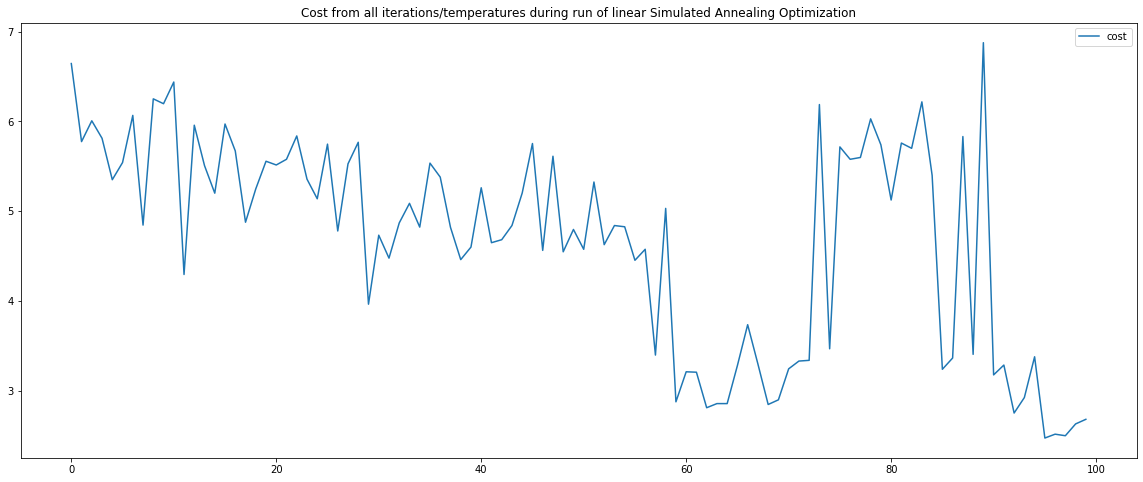

In [22]:
df2.plot.line( y='cost',figsize=(20,8))
plt.title('Cost from all iterations/temperatures during run of linear Simulated Annealing Optimization')

## Show qualities of wine with highest quality

In [23]:
# those characteristics that are above 6.5
max_cost_df = df2.query('cost >= 6.5')
# stack low quality on min predicted quality
max_cost_df = max_cost_df.rename(columns={'cost': 'quality'})
max_cost_df

,iteration,quality,temperature,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
0,0,6.645835,6000,7.000000,0.170000,0.740000,12.800000,0.045000,24.000000,126.000000,0.994200,3.260000,0.380000,12.200000,0.000000
89,89,6.878482,6000,7.985843,0.938247,0.445213,13.536201,0.153226,24.736201,126.736201,0.993977,3.423073,1.277066,12.936201,0.445213


## Show the sampling from the distributions of data for maximizing wine quality

Below we plot the probability density distibution for all wine attributes and show the values that were generated from runing SA on the ML model to maximize wine quality. We noticed that many of the attribute values were sampled from the center of the probability distributions and overlap with the actual data used to train the model. For example, fixed acidity values were almost uniformly sampled from 4.5 to 14.5 (shown as dark blue rug) and used to maximize wine quality out of all data points considered from the full dataset (shown in light blue).

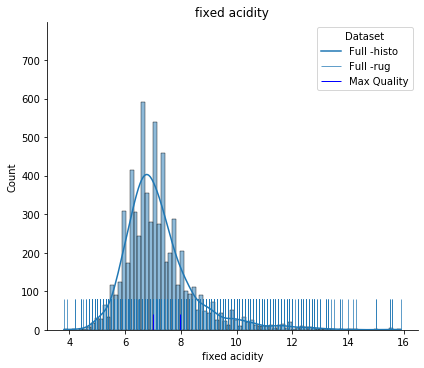

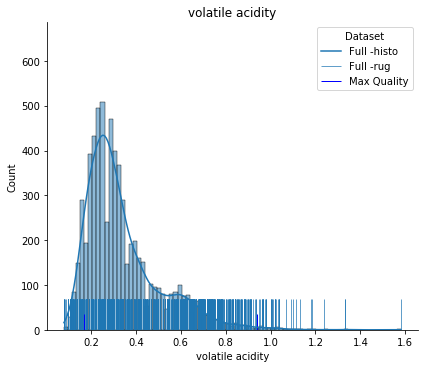

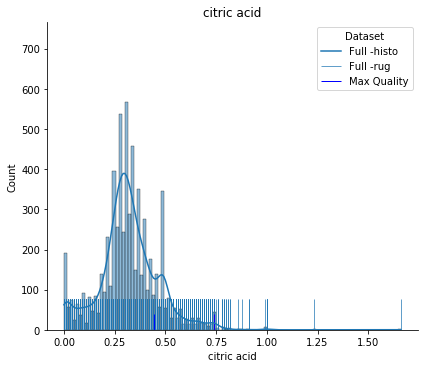

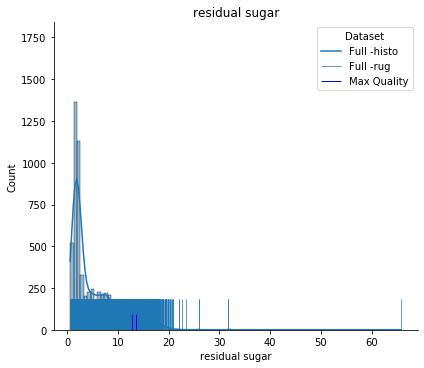

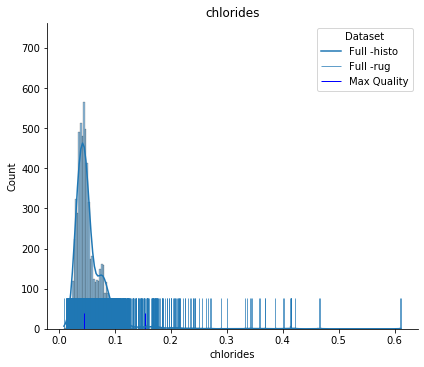

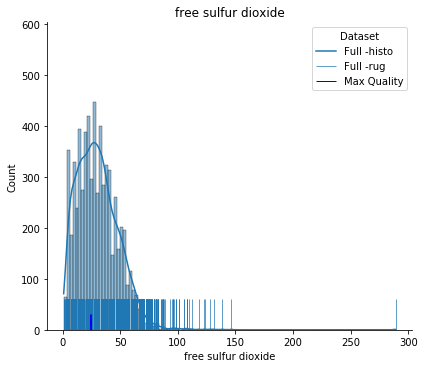

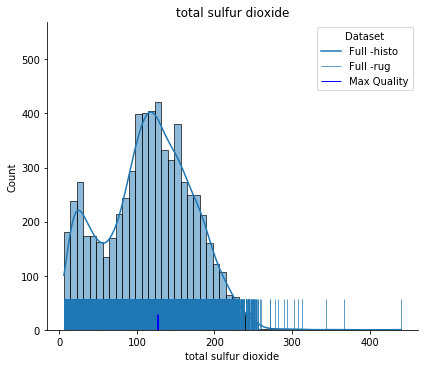

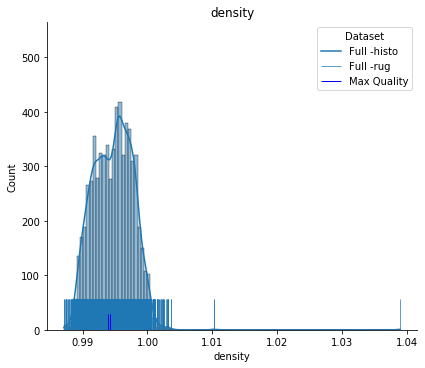

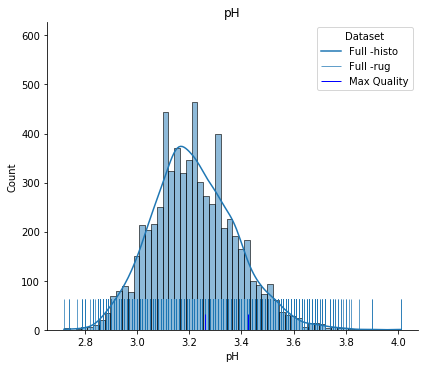

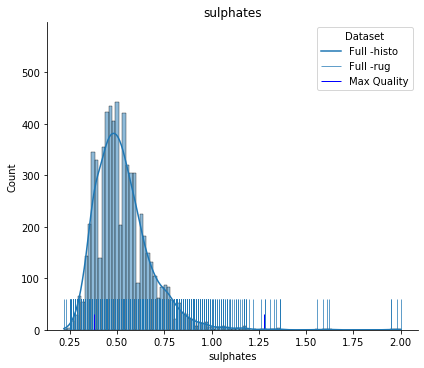

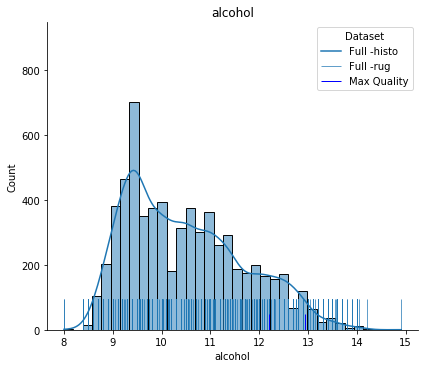

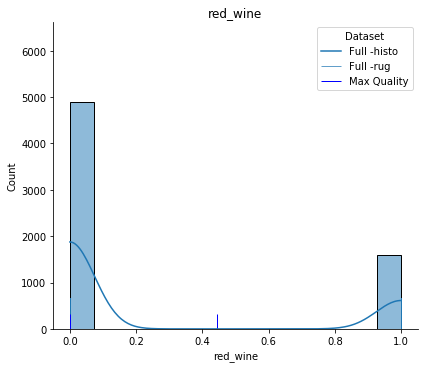

In [24]:
#f, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,15))
cols =["fixed acidity","volatile acidity", 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'red_wine']
for col in cols:
    g = sns.displot(df[col],
                 kde=True,
                 rug=True,
                 rug_kws={"alpha": 0.7, "linewidth": 1, "height":0.1},height=5, aspect=1.2)
    sns.rugplot(data=max_cost_df, x=col, height=0.05,lw=1,color= "b",ax=g)
    plt.legend(title='Dataset', loc='upper right', labels=['Full -histo','Full -rug', 'Max Quality'])
    plt.title(col)

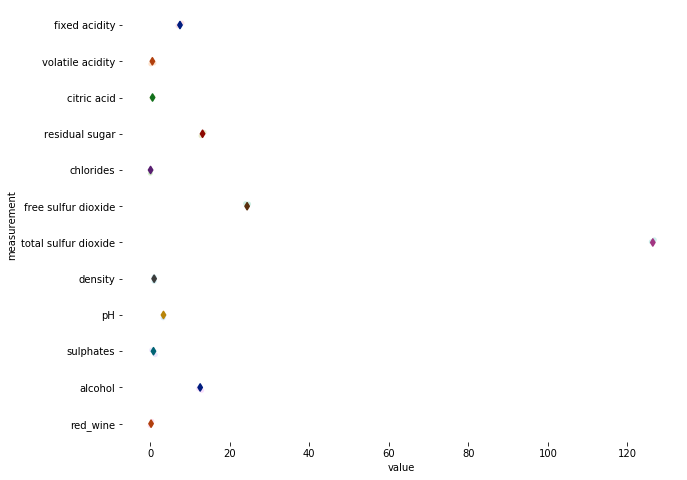

In [25]:
# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(max_cost_df.drop(columns=['iteration']),  id_vars=['quality','temperature'], var_name='measurement', value_name='value',)

# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement",
              data=iris, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement",
              data=iris, dodge=.8 - .8 / 1,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)

In [26]:
iris['quality'].nunique()

2

In [27]:
iris['quality_bins'] = pd.cut(iris['quality'], 3)
iris

,quality,temperature,measurement,value,quality_bins
0,6.645835,6000,fixed acidity,7.000000,"(6.646, 6.723]"
1,6.878482,6000,fixed acidity,7.985843,"(6.801, 6.878]"
2,6.645835,6000,volatile acidity,0.170000,"(6.646, 6.723]"
3,6.878482,6000,volatile acidity,0.938247,"(6.801, 6.878]"
4,6.645835,6000,citric acid,0.740000,"(6.646, 6.723]"
5,6.878482,6000,citric acid,0.445213,"(6.801, 6.878]"
6,6.645835,6000,residual sugar,12.800000,"(6.646, 6.723]"
7,6.878482,6000,residual sugar,13.536201,"(6.801, 6.878]"
8,6.645835,6000,chlorides,0.045000,"(6.646, 6.723]"
9,6.878482,6000,chlorides,0.153226,"(6.801, 6.878]"


Text(0.5, 1.0, 'Scatterplot showing the attributes (values and means) for predicted max wine quality (divided into 3 bins)')

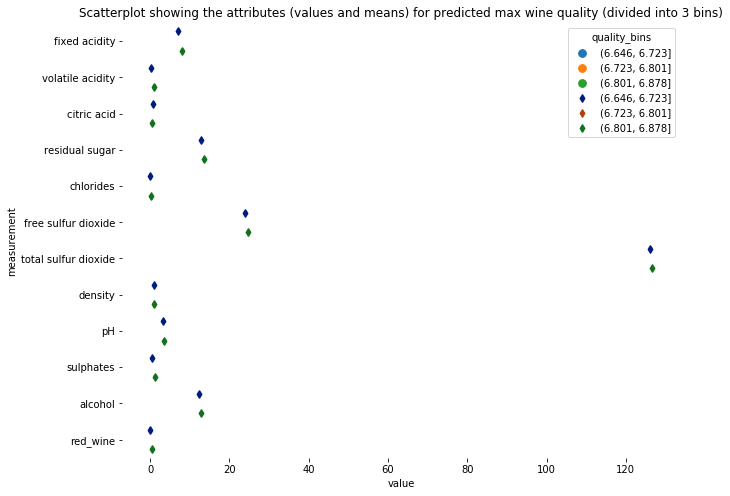

In [28]:
# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="quality_bins",
              data=iris, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement", hue="quality_bins",
              data=iris, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
plt.title('Scatterplot showing the attributes (values and means) for predicted max wine quality (divided into 3 bins)')

### Compare wine attributes with high (>=6.5) quality from actual dataset with predictions

In [29]:
# "Melt" the dataset to "long-form" or "tidy" representation

melted_highq_actual = pd.melt(df.query("quality>=6.5"), var_name='measurement', value_name='value')
melted_highq_actual['Data'] = "Actual"

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(max_cost_df.drop(columns=['iteration','temperature']), var_name='measurement', value_name='value')

iris['Data'] = "Predicted"
highq = pd.concat([melted_highq_actual,iris])
highq

,measurement,value,Data
0,fixed acidity,7.300000,Actual
1,fixed acidity,7.800000,Actual
2,fixed acidity,8.500000,Actual
3,fixed acidity,8.100000,Actual
4,fixed acidity,7.500000,Actual
...,...,...,...
21,sulphates,1.277066,Predicted
22,alcohol,12.200000,Predicted
23,alcohol,12.936201,Predicted
24,red_wine,0.000000,Predicted


Text(0.5, 1.0, 'Comparision of Actual & Predicted High Quality Wine Attributes')

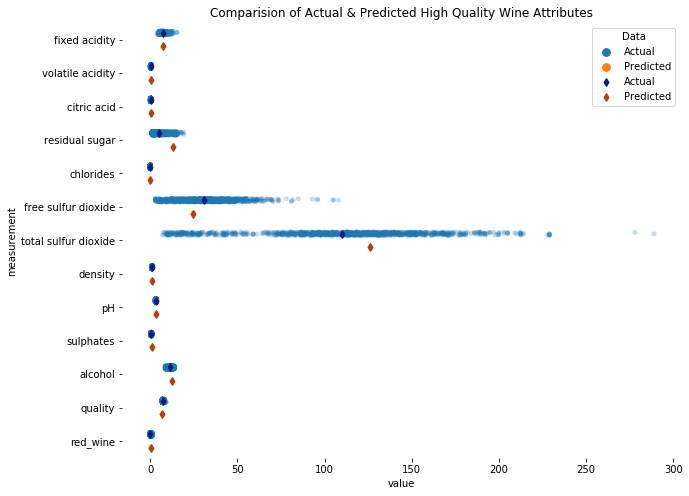

In [30]:
# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="Data",
              data=highq, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement", hue="Data",
              data=highq, dodge=.8 - .8 / 2,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
#plt.xlim(0, 5)
plt.title('Comparision of Actual & Predicted High Quality Wine Attributes')

In [1]:
# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="Data",
              data=highq, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement", hue="Data",
              data=highq, dodge=.8 - .8 / 2,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
plt.xlim(0, 5)
plt.title('Comparision of Actual & Predicted High Quality Wine Attributes')

NameError: name 'plt' is not defined

In [32]:
# comparision of means table
temp = highq.groupby(['Data',"measurement"]).mean().reset_index()
temp = temp.pivot(index='measurement', columns='Data', values='value')
temp['Difference'] = temp["Actual"] - temp["Predicted"]
temp

Data,Actual,Predicted,Difference
measurement,,,
alcohol,11.433359,12.568101,-1.134741
chlorides,0.044576,0.099113,-0.054537
citric acid,0.334628,0.592607,-0.257979
density,0.993027,0.994089,-0.001062
fixed acidity,7.085709,7.492921,-0.407213
free sulfur dioxide,31.055208,24.368101,6.687107
pH,3.227651,3.341536,-0.113886
quality,7.158966,6.762159,0.396808
red_wine,0.169930,0.222607,-0.052677


Most predicted wine attributes were close to actual values with the exemption of free sulfur dioxide, residual sugar, and total sulfur dioxide.

## Show ranges of all inputs for minimum wine quality

In [34]:
# those characteristics that are below 2
df2.query('cost <= 3.0')

,iteration,cost,temperature,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
59,59,2.874158,6000,6.186781,1.317480,0.737488,11.737139,0.447038,22.937139,124.937139,1.024853,3.747487,1.687435,11.137139,0.737488
62,62,2.808213,6000,7.079224,1.509686,0.929686,12.629583,0.554871,23.829583,125.829583,1.034144,3.939686,1.879686,12.029583,0.929686
63,63,2.854252,6000,7.027638,1.265423,0.685423,12.577997,0.304247,23.777997,125.777997,1.010369,3.695423,1.635423,11.977997,0.685423
64,64,2.854252,6000,7.132056,1.257768,0.677768,12.682415,0.372859,23.882415,125.882415,1.018461,3.687768,1.627768,12.082415,0.677768
68,68,2.844332,6000,7.547988,1.319897,0.739897,13.098347,0.422300,24.298347,126.298347,1.022721,3.749897,1.689897,12.498347,0.739897
69,69,2.896285,6000,7.620588,1.255132,0.675132,13.170947,0.353705,24.370947,126.370947,1.016811,3.685132,1.625132,12.570947,0.675132
92,92,2.749060,6000,8.716737,1.489518,0.913135,14.267096,0.542865,25.467096,127.467096,1.033109,3.921381,1.856189,13.667096,0.913135
93,93,2.921847,6000,8.847196,1.361793,0.783130,14.397555,0.401051,25.597555,127.597555,1.019812,3.792481,1.730563,13.723731,0.783130
95,95,2.470306,6000,9.034253,1.466614,0.888364,14.584611,0.547928,25.784611,127.784611,1.033546,3.897102,1.835743,13.860088,0.888364
96,96,2.513326,6000,9.315807,1.446009,0.866391,14.866166,0.488000,26.066166,128.066166,1.027649,3.876115,1.815818,13.899292,0.866391


In [35]:
min_cost_df = df2.query('cost <= 3.0').reset_index(drop=True)
# stack low quality on min predicted quality
min_cost_df.rename(columns={'cost': 'quality'}, inplace=True)
min_cost_df

,iteration,quality,temperature,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
0,59,2.874158,6000,6.186781,1.317480,0.737488,11.737139,0.447038,22.937139,124.937139,1.024853,3.747487,1.687435,11.137139,0.737488
1,62,2.808213,6000,7.079224,1.509686,0.929686,12.629583,0.554871,23.829583,125.829583,1.034144,3.939686,1.879686,12.029583,0.929686
2,63,2.854252,6000,7.027638,1.265423,0.685423,12.577997,0.304247,23.777997,125.777997,1.010369,3.695423,1.635423,11.977997,0.685423
3,64,2.854252,6000,7.132056,1.257768,0.677768,12.682415,0.372859,23.882415,125.882415,1.018461,3.687768,1.627768,12.082415,0.677768
4,68,2.844332,6000,7.547988,1.319897,0.739897,13.098347,0.422300,24.298347,126.298347,1.022721,3.749897,1.689897,12.498347,0.739897
5,69,2.896285,6000,7.620588,1.255132,0.675132,13.170947,0.353705,24.370947,126.370947,1.016811,3.685132,1.625132,12.570947,0.675132
6,92,2.749060,6000,8.716737,1.489518,0.913135,14.267096,0.542865,25.467096,127.467096,1.033109,3.921381,1.856189,13.667096,0.913135
7,93,2.921847,6000,8.847196,1.361793,0.783130,14.397555,0.401051,25.597555,127.597555,1.019812,3.792481,1.730563,13.723731,0.783130
8,95,2.470306,6000,9.034253,1.466614,0.888364,14.584611,0.547928,25.784611,127.784611,1.033546,3.897102,1.835743,13.860088,0.888364
9,96,2.513326,6000,9.315807,1.446009,0.866391,14.866166,0.488000,26.066166,128.066166,1.027649,3.876115,1.815818,13.899292,0.866391


Text(0.5, 1.0, 'Scatterplot showing the attributes (values and means) for predicted min wine quality (divided into 3 bins)')

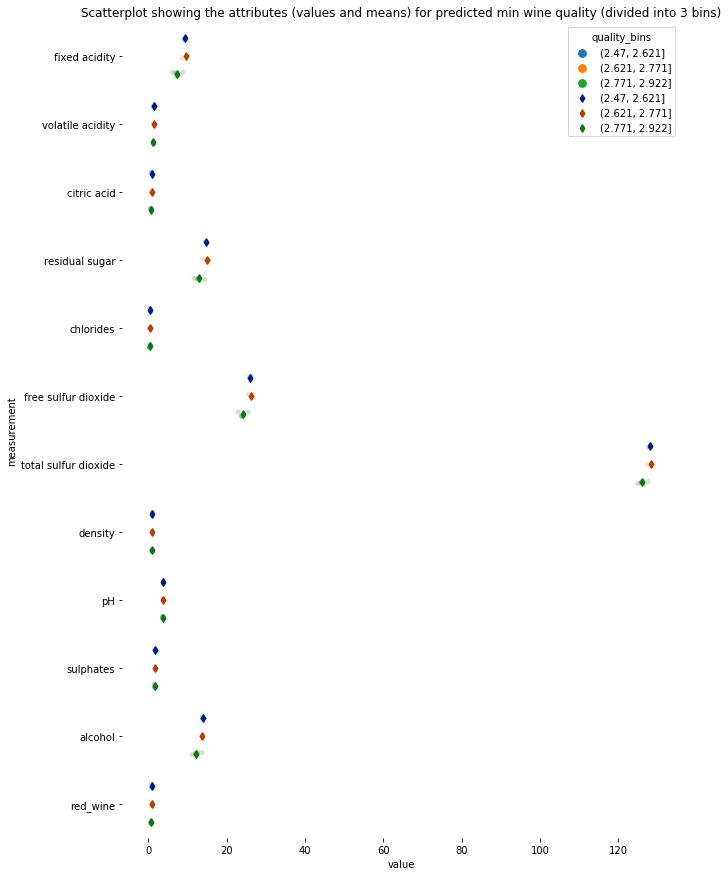

In [36]:
# "Melt" the dataset to "long-form" or "tidy" representation
min_cost_long_cost = pd.melt(min_cost_df.drop(columns=['iteration']),  id_vars=["quality",'temperature'], var_name='measurement', value_name='value')
min_cost_long_cost['quality_bins'] = pd.cut(min_cost_long_cost['quality'], 3)

# Initialize the figure
f, ax = plt.subplots(figsize=(10,15))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="quality_bins",
              data=min_cost_long_cost, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement", hue="quality_bins",
              data=min_cost_long_cost, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
plt.title('Scatterplot showing the attributes (values and means) for predicted min wine quality (divided into 3 bins)')
# Improve the legend
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[3:], labels[3:], title="cost",  handletextpad=0, columnspacing=1,
#          loc="lower right", ncol=3, frameon=True)

Text(0.5, 1.0, 'Predicted Low Quality Wine Attributes')

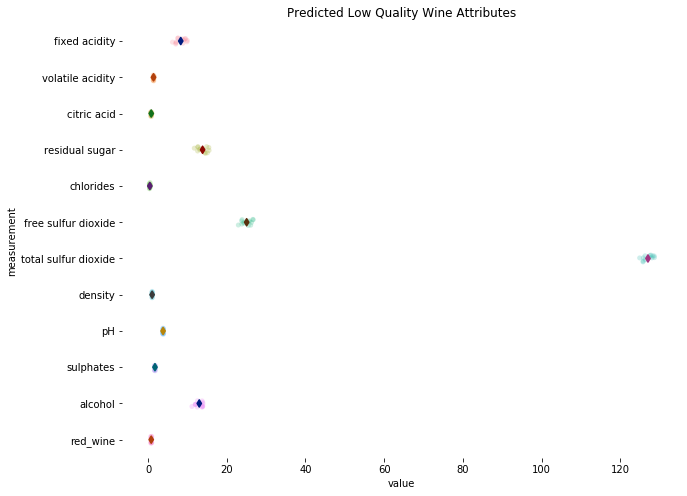

In [37]:
# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement",
              data=min_cost_long_cost, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement",
              data=min_cost_long_cost, dodge=.8 - .8 / 1,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
plt.title('Predicted Low Quality Wine Attributes')

Text(0.5, 1.0, 'Predicted Low Quality Wine Attributes - limit x-axis to 0-10')

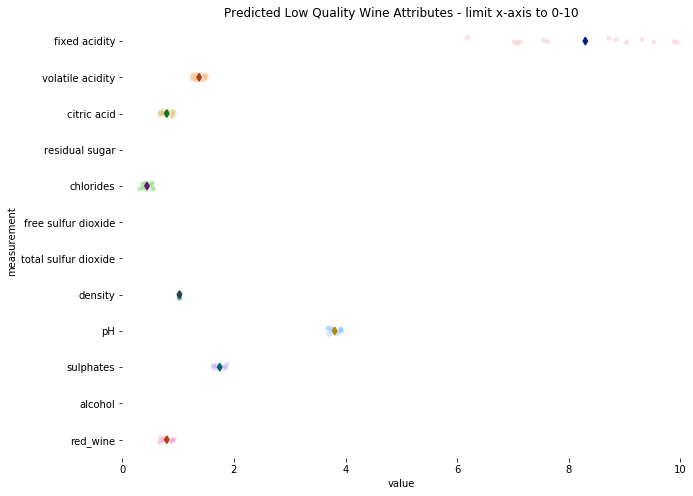

In [38]:
# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement",
              data=min_cost_long_cost, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement",
              data=min_cost_long_cost, dodge=.8 - .8 / 1,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
plt.xlim(0, 10)
plt.title('Predicted Low Quality Wine Attributes - limit x-axis to 0-10')

Text(0.5, 1.0, 'Predicted Low Quality Wine Attributes - Limit x-axis to 0-5')

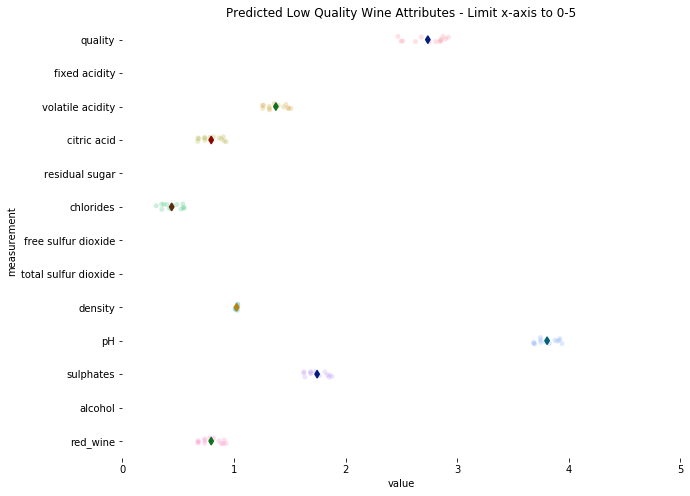

In [39]:
# Plot distribution including cost
# "Melt" the dataset to "long-form" or "tidy" representation
min_cost_long = pd.melt(min_cost_df.drop(columns=['iteration']),  id_vars=['temperature'], var_name='measurement', value_name='value')

# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement",
              data=min_cost_long, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement", 
              data=min_cost_long, dodge=.8 - .8 / 1,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
plt.xlim(0, 5)
plt.title('Predicted Low Quality Wine Attributes - Limit x-axis to 0-5')

### Compare wine attributes with low (<=3) quality from actual dataset with predictions

In [40]:
# "Melt" the dataset to "long-form" or "tidy" representation
melted_lowq_actual = pd.melt(df.query("quality<=3"), var_name='measurement', value_name='value')
melted_lowq_actual['Data'] = "Actual"

# "Melt" the dataset to "long-form" or "tidy" representation
min_cost_long = pd.melt(min_cost_df.drop(columns=['iteration','temperature']), var_name='measurement', value_name='value')

min_cost_long['Data'] = "Predicted"
lowq = pd.concat([melted_lowq_actual,min_cost_long])
lowq

,measurement,value,Data
0,fixed acidity,11.600000,Actual
1,fixed acidity,10.400000,Actual
2,fixed acidity,7.400000,Actual
3,fixed acidity,10.400000,Actual
4,fixed acidity,8.300000,Actual
...,...,...,...
164,red_wine,0.888364,Predicted
165,red_wine,0.866391,Predicted
166,red_wine,0.816609,Predicted
167,red_wine,0.904320,Predicted


Text(0.5, 1.0, 'Comparision of Actual & Predicted Low Quality Wine Attributes')

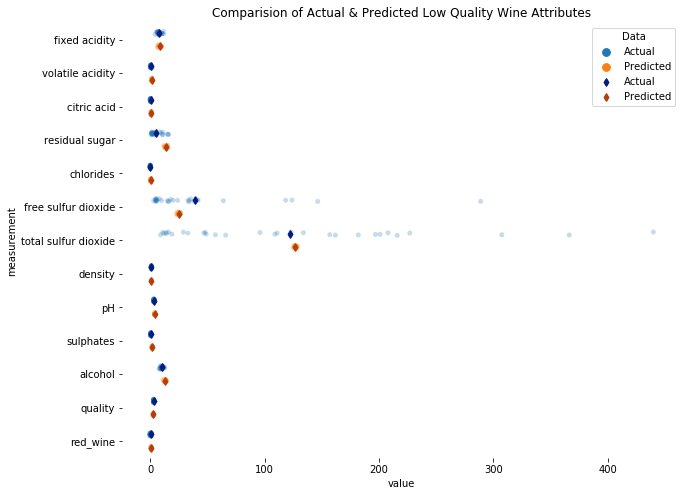

In [41]:
# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="Data",
              data=lowq, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement", hue="Data",
              data=lowq, dodge=.8 - .8 / 2,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
#plt.xlim(0, 5)
plt.title('Comparision of Actual & Predicted Low Quality Wine Attributes')

Text(0.5, 1.0, 'Comparision of Actual & Predicted Low Quality Wine Attributes- Limit x-axis to 0-5')

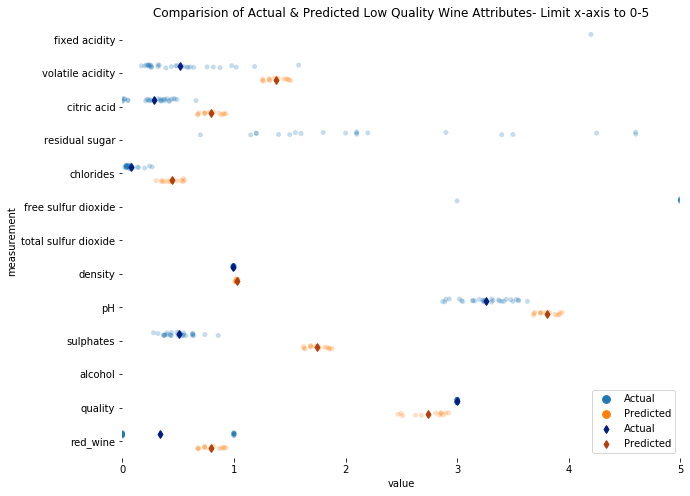

In [42]:
# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="Data",
              data=lowq, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement", hue="Data",
              data=lowq, dodge=.8 - .8 / 2,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
plt.xlim(0, 5)
plt.legend( loc = 'lower right')
plt.title('Comparision of Actual & Predicted Low Quality Wine Attributes- Limit x-axis to 0-5')

In [43]:
# comparision of means table
temp = lowq.groupby(['Data',"measurement"]).mean().reset_index()
temp = temp.pivot(index='measurement', columns='Data', values='value')
temp['Difference'] = temp["Actual"] - temp["Predicted"]
temp

Data,Actual,Predicted,Difference
measurement,,,
alcohol,10.215000,13.003698,-2.788698
chlorides,0.077033,0.442373,-0.365339
citric acid,0.281000,0.796447,-0.515447
density,0.995744,1.024092,-0.028348
fixed acidity,7.853333,8.297304,-0.443970
free sulfur dioxide,39.216667,25.047662,14.169004
pH,3.257667,3.806136,-0.548470
quality,3.000000,2.737582,0.262418
red_wine,0.333333,0.796447,-0.463113


Many of the mean values from the predicted wine attributes closely aligned with those from the actual, with the exception of a few variables. 

## Show the sampling from the distributions of data for minimizing wine quality

Below we plot the probability density distibution for all wine attributes and show the values that were generated from the ML model to minimize the wine quality. We noticed that many of the attribute values were sampled from the tails of the distribution. For example, fixed acidity values below 4 and above 9 (shown as dark blue rug) were used to minimize wine quality out of all data points considered from the full dataset (shown in llight blue).

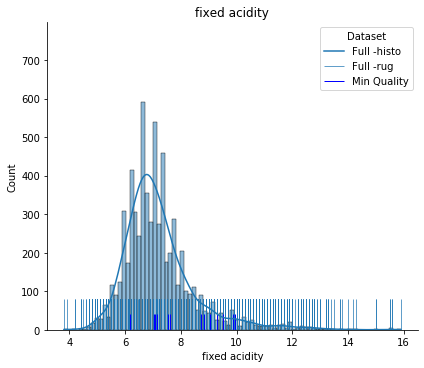

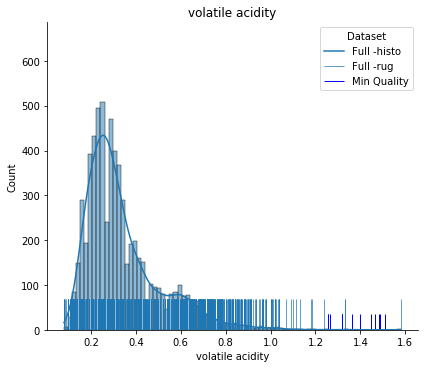

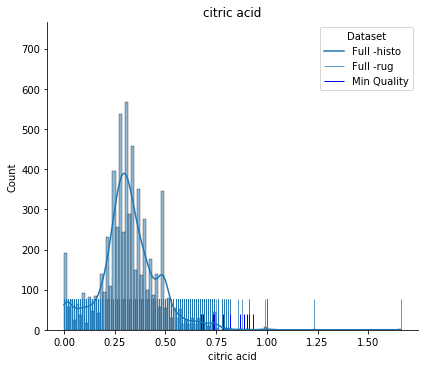

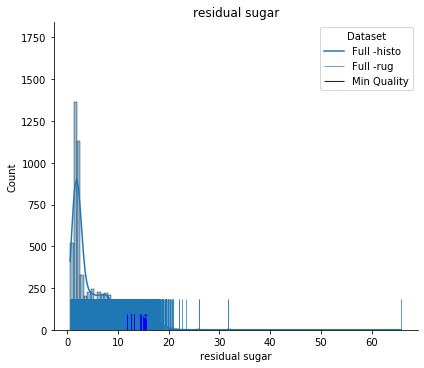

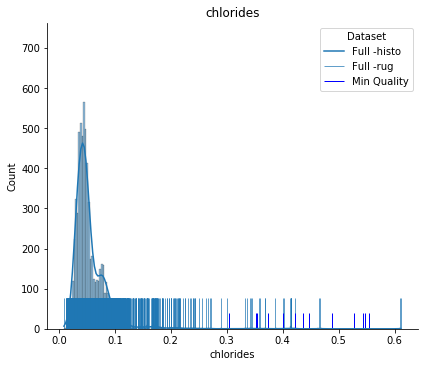

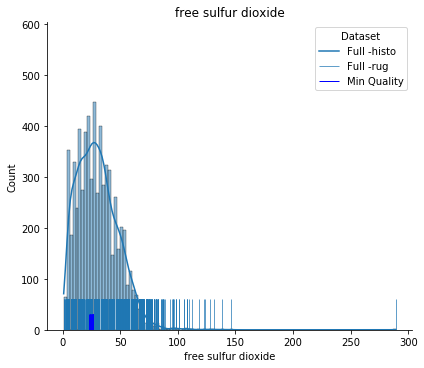

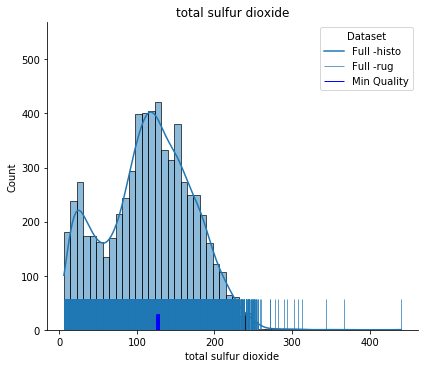

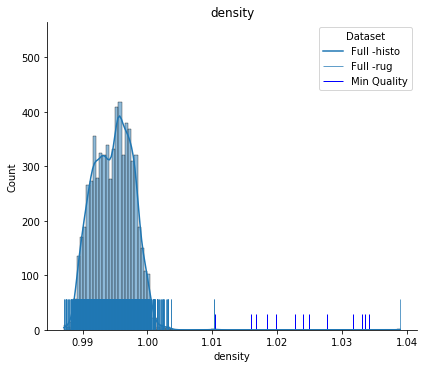

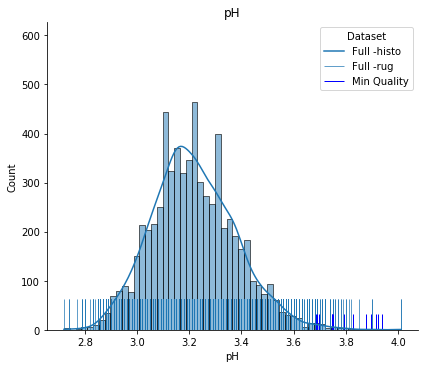

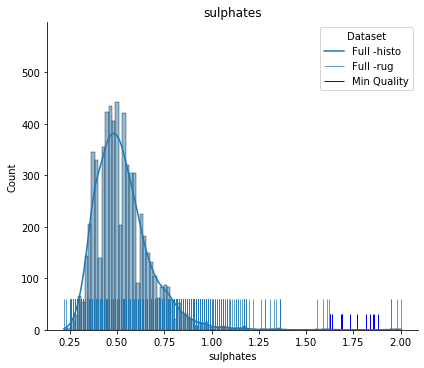

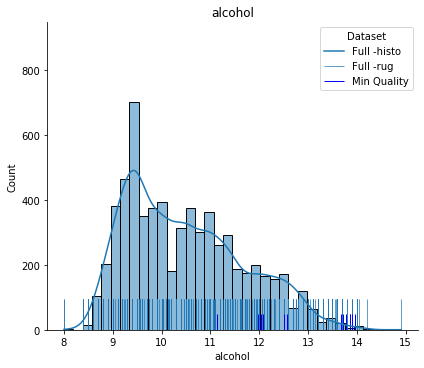

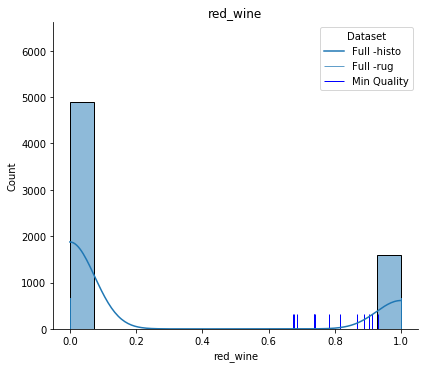

In [44]:
#f, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,15))
cols =["fixed acidity","volatile acidity", 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'red_wine']
for col in cols:
    g = sns.displot(df[col],
                 kde=True,
                 rug=True,
                 rug_kws={"alpha": 0.7, "linewidth": 1, "height":0.1},height=5, aspect=1.2)
    sns.rugplot(data=min_cost_df, x=col, height=0.05,lw=1,color= "b",ax=g)
    plt.legend(title='Dataset', loc='upper right', labels=['Full -histo','Full -rug', 'Min Quality'])
    plt.title(col)